In [1]:
%run Project_1_Eindresultaat.ipynb

/tmp/ipykernel_34002/4036444232.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  User = np.array([UserList, UserList_Tags, randomTags, randomRecipes, Usertag, K, Test_Favorieten, \


## Validate

In [2]:
def testClassifiers():
    #---Models
    model_lr = LogisticRegression(max_iter=len(TotalValidateMatrix)+100)
    model_knn = KNeighborsClassifier()
    model_svm = SVC()
    model_rfc = RandomForestClassifier()
    model_gnb = GaussianNB()
    
    parameters_lr = {'C': np.logspace(-5, 8, 15)}
    parameters_knn = {'n_neighbors': list(range(1, 20)),
                     'leaf_size' : list(range(1, 10)), 
                      'p':[1,2]}
    parameters_svm = {'C': [0.1, 1, 10, 100],  
                    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                    'gamma':['scale', 'auto']}
                    #'kernel': ['linear']}
    parameters_rfc = {'min_samples_split': [0,5,10,20],
                      'min_samples_leaf': [2,4,6,8,10],
                      'min_weight_fraction_leaf': [0.01, 0.05, 0.1]}
    parameters_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

    
    #---Logistic Regression
    print("\nLogistic Regression")
    Grid_lr = GridSearchCV(model_lr, parameters_lr, cv=5)
    Grid_lr.fit(X_train, y_train)

    y_pred = Grid_lr.predict(TotalValidateMatrix)

    #print("y_pred: ", y_pred)
    print("Tuned Logistic Regression Parameters: {}".format(Grid_lr.best_params_)) 
    print("Best score is {}".format(Grid_lr.best_score_))
    print("Confusion Matrix: \n", confusion_matrix(y_true = y_validate, y_pred = y_pred))
    print("Accuracy Score: ", accuracy_score(y_validate, y_pred))
    print("Score: ", Grid_lr.score(TotalValidateMatrix, y_validate))

#---K_NearestNeighbors
    print("\nK_NearestNeighbors")
    Grid_knn = GridSearchCV(model_knn, parameters_knn, cv=5)
    Grid_knn.fit(X_train, y_train)

    y_pred = Grid_knn.predict(TotalValidateMatrix)

    #print("y_pred: ", y_pred)
    print("Tuned K_NearestNeighbors Parameters: {}".format(Grid_knn.best_params_)) 
    print("Best score is {}".format(Grid_knn.best_score_))
    print("Confusion Matrix: \n", confusion_matrix(y_true = y_validate, y_pred = y_pred))
    print("Accuracy Score: ", accuracy_score(y_validate, y_pred))
    print("Score: ", Grid_knn.score(TotalValidateMatrix, y_validate))

#---SVC
    print("\nSVM")
    Grid_svm = GridSearchCV(model_svm, parameters_svm, cv=5)
    Grid_svm.fit(X_train, y_train)

    y_pred = Grid_svm.predict(TotalValidateMatrix)

    #print("y_pred: ", y_pred)
    print("Tuned SVM Parameters: {}".format(Grid_svm.best_params_)) 
    print("Best score is {}".format(Grid_svm.best_score_))
    print("Confusion Matrix: \n", confusion_matrix(y_true = y_validate, y_pred = y_pred))
    print("Accuracy Score: ", accuracy_score(y_validate, y_pred))
    print("Score: ", Grid_svm.score(TotalValidateMatrix, y_validate))
    
#---RFC
    print("\nRFC")
    Grid_rfc = GridSearchCV(model_rfc, parameters_rfc, cv=5)
    Grid_rfc.fit(X_train, y_train)

    y_pred = Grid_rfc.predict(TotalValidateMatrix)

    #print("y_pred: ", y_pred)
    print("Tuned RFC Parameters: {}".format(Grid_rfc.best_params_)) 
    print("Best score is {}".format(Grid_rfc.best_score_))
    print("Confusion Matrix: \n", confusion_matrix(y_true = y_validate, y_pred = y_pred))
    print("Accuracy Score: ", accuracy_score(y_validate, y_pred))
    print("Score: ", Grid_rfc.score(TotalValidateMatrix, y_validate))

#---Gaussian Naive Bayes
    print("\nGaussian Naive Bayes")
    Grid_gnb = GridSearchCV(model_gnb, parameters_gnb, cv=5)
    Grid_gnb.fit(X_train, y_train)

    y_pred = Grid_gnb.predict(TotalValidateMatrix)

    #print("y_pred: ", y_pred)
    print("Tuned RFC Parameters: {}".format(Grid_gnb.best_params_)) 
    print("Best score is {}".format(Grid_gnb.best_score_))
    print("Confusion Matrix: \n", confusion_matrix(y_true = y_validate, y_pred = y_pred))
    print("Accuracy Score: ", accuracy_score(y_validate, y_pred))
    print("Score: ", Grid_gnb.score(TotalValidateMatrix, y_validate))

    print("====================================================================")
    
    return Grid_lr.best_params_, Grid_knn.best_params_, Grid_svm.best_params_, Grid_rfc.best_params_, Grid_gnb.best_params_

In [3]:
Lr_best_params, Knn_best_params, SVM_best_params, RFC_best_params, GNB_best_params = testClassifiers()


Logistic Regression
Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.5670833333333334
Confusion Matrix: 
 [[  0 400]
 [201 199]]
Accuracy Score:  0.24875
Score:  0.24875

K_NearestNeighbors
Tuned K_NearestNeighbors Parameters: {'leaf_size': 1, 'n_neighbors': 18, 'p': 1}
Best score is 0.7905208333333333
Confusion Matrix: 
 [[296 104]
 [106 294]]
Accuracy Score:  0.7375
Score:  0.7375

SVM
Tuned SVM Parameters: {'C': 10, 'gamma': 'scale'}
Best score is 0.7931250000000001
Confusion Matrix: 
 [[232 168]
 [144 256]]
Accuracy Score:  0.61
Score:  0.61

RFC
Tuned RFC Parameters: {'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.01}
Best score is 0.7222916666666668
Confusion Matrix: 
 [[168 232]
 [119 281]]
Accuracy Score:  0.56125
Score:  0.56125

Gaussian Naive Bayes
Tuned RFC Parameters: {'var_smoothing': 0.0657933224657568}
Best score is 0.5445833333333334
Confusion Matrix: 
 [[ 80 320]
 [282 118]]
Accuracy Score:  0.2475
Score: 

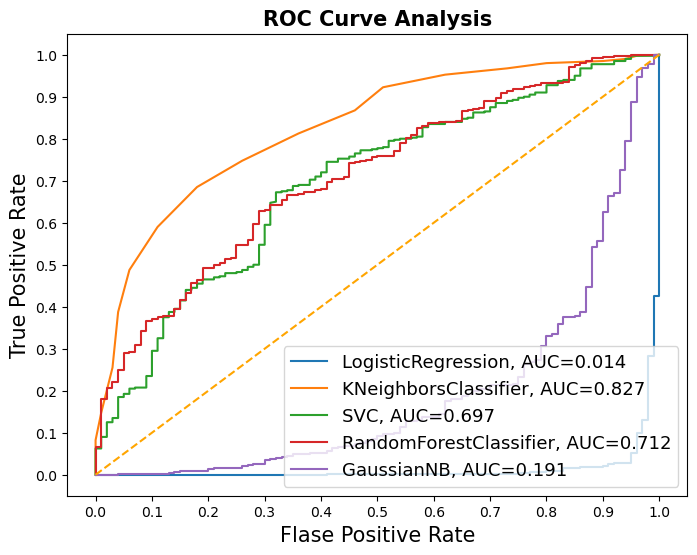

In [4]:
#Models
model_lr = LogisticRegression(C = Lr_best_params['C'], max_iter=len(TotalValidateMatrix)+100)
model_knn = KNeighborsClassifier(leaf_size= Knn_best_params['leaf_size'], n_neighbors= Knn_best_params['n_neighbors'],  
									p= Knn_best_params['p'])
model_svm = SVC(C= SVM_best_params['C'], gamma= SVM_best_params['gamma'], probability= True)
model_rfc = RandomForestClassifier(min_samples_leaf = RFC_best_params['min_samples_leaf'], 
						min_samples_split= RFC_best_params['min_samples_split'], 
						min_weight_fraction_leaf= RFC_best_params['min_weight_fraction_leaf'])
model_gbn = GaussianNB(var_smoothing=GNB_best_params['var_smoothing'])

# Instantiate the classfiers and make a list
classifiers = [model_lr, model_knn, model_svm, model_rfc, model_gbn]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(TotalTestMatrix)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

#Plot figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

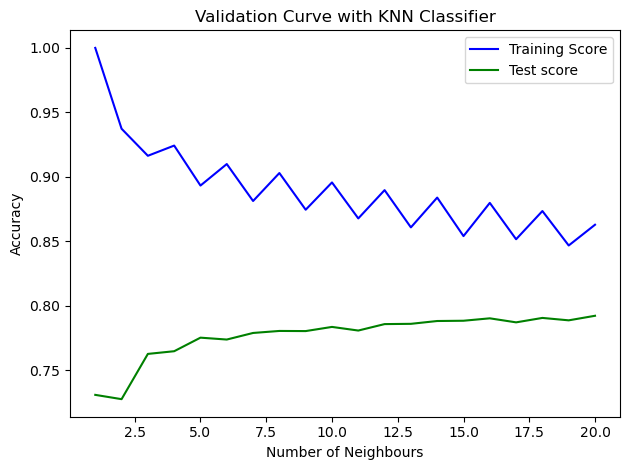

In [5]:
# Setting the range for the parameter (from 1 to 21)
parameter_range = np.arange(1, 21, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(leaf_size= Knn_best_params['leaf_size'], 
									p= Knn_best_params['p']), X_train, y_train, 
									param_name = "n_neighbors", 
									param_range = parameter_range, 
									cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
	label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
label = "Test score", color = 'g')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


In [6]:
model_knn = KNeighborsClassifier(leaf_size= Knn_best_params['leaf_size'], n_neighbors= Knn_best_params['n_neighbors'], 
									p= Knn_best_params['p'])
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(TotalTestMatrix)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.74375
